In [1]:
import csv

In [2]:
# 基本的なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# テキストファイルをcsvに読みとる
path ="gauss_data.txt"
with open (path) as f:
    while True:
        s_line = f.readline()
        s_list = s_line.strip().split()
        with open('gauss_data.csv', 'a') as g:
            writer = csv.writer(g)
            writer.writerow(s_list)
        if not s_line:
            break            

In [3]:
data = pd.read_csv('gauss_data.csv', header=None)

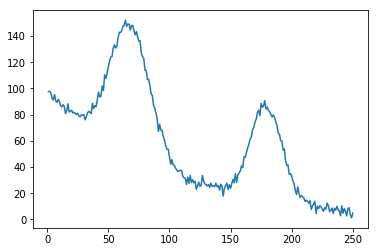

In [5]:
# data[1]にx座標、data[0]にy座標の値が入っている
x = data[1]
y = data[0]

plt.plot(x, y)

In [6]:
# フィッティングしたいモデルのインポート
from lmfit.models import ExponentialModel, GaussianModel

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 250
    # variables        = 8
    chi-square         = 1315.82224
    reduced chi-square = 5.43728200
    Akaike info crit   = 431.189028
    Bayesian info crit = 459.360715
[[Variables]]
    exp_decay:      95.2628050 +/- 1.03512176 (1.09%) (init = 96.605)
    exp_amplitude:  98.7782112 +/- 0.57527350 (0.58%) (init = 156.9105)
    g1_sigma:       16.3552194 +/- 0.12331926 (0.75%) (init = 10)
    g1_center:      67.4811114 +/- 0.10460602 (0.16%) (init = 55)
    g1_amplitude:   4119.72996 +/- 35.8179852 (0.87%) (init = 2000)
    g1_fwhm:        38.5135977 +/- 0.29039467 (0.75%) == '2.3548200*g1_sigma'
    g1_height:      100.489911 +/- 0.58831845 (0.59%) == '0.3989423*g1_amplitude/max(1.e-15, g1_sigma)'
    g2_sigma:       13.0032616 +/- 0.14237112 (1.09%) (init = 10)


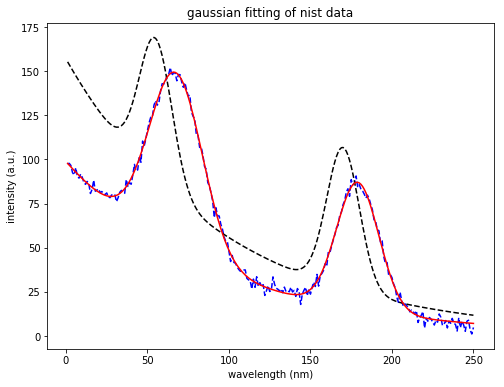

In [7]:
# expモデルの定義
# パラメータオブジェクトparsの生成
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

# 1つ目のピーク
gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())
pars['g1_center'].set(55, min=40, max=100)
pars['g1_sigma'].set(10, min=3)
pars['g1_amplitude'].set(2000, min=10)

# 2つ目のピーク
gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())
pars['g2_center'].set(170, min=150, max=200)
pars['g2_sigma'].set(10, min=3)
pars['g2_amplitude'].set(2000, min=10)

# モデルの合成
mod = gauss1 + gauss2 + exp_mod

# 初期値
init = mod.eval(pars, x=x)

# 最適値
out = mod.fit(y, pars, x=x);
print(out.fit_report(min_correl=0.5))

plot_components = False

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b--')
plt.plot(x, init, 'k--')
plt.plot(x, out.best_fit, 'r-')
plt.title('gaussian fitting of nist data')
plt.xlabel('wavelength (nm)')
plt.ylabel('intensity (a.u.)')

if plot_components:
    comps = out.eval_components(x=x)
    plt.plot(x, comps['g1_'], 'b--')
    plt.plot(x, comps['g2_'], 'b--')
    plt.plot(x, comps['exp_'], 'k--')   

plt.savefig('result.jpg')